In [4]:
from femdvr import FEMDVR
from lobatto import GaussLegendreLobatto
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import kron, csr_matrix, diags
from scipy.sparse.linalg import eigsh
%matplotlib widget


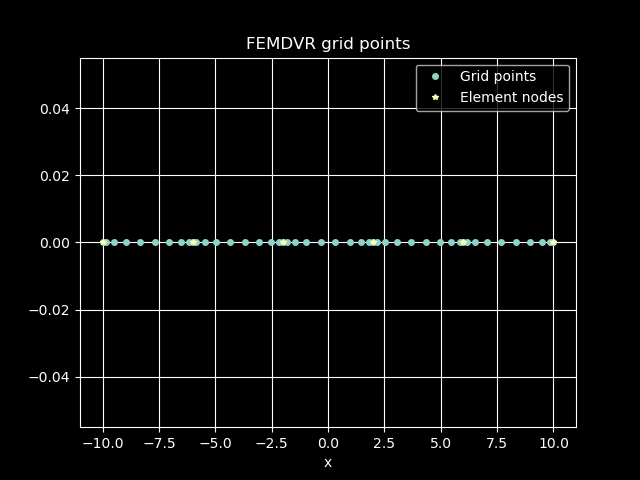

In [38]:
L = 10
n_points = 10
n_elem = 5
elem_nodes = np.linspace(-L, L, n_elem + 1)
femdvr0 = FEMDVR(elem_nodes, np.array([n_points] * n_elem), GaussLegendreLobatto)
x = femdvr0.x
ng = len(x)
x_inner = x[1:-1]

plt.figure()
plt.plot(x, np.zeros_like(x), 'o', markersize=4, label='Grid points')
plt.plot(elem_nodes, np.zeros_like(elem_nodes), '*', markersize=4, label='Element nodes')
plt.title('FEMDVR grid points')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()


Maximum error in first derivative (interior points):  0.04617105669675857
Maximum error in second derivative (interior points):  0.04409324560547745


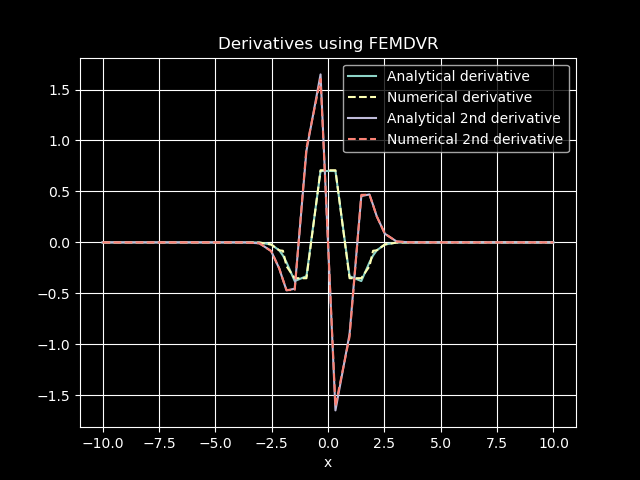

In [ ]:
D = femdvr0.D
D2 = femdvr0.D2
f = x * np.exp(-x**2)
dfdx = (1 - 2 * x**2) * np.exp(-x**2)
ddfdx = (4 * x**3 - 6 * x) * np.exp(-x**2)
dfdx_numerical = D @ f
ddfdx_numerical = D2 @ f

error = np.max( np.abs( dfdx - dfdx_numerical ) )
print("Maximum error in first derivative: ", error)

error = np.max( np.abs( ddfdx - ddfdx_numerical ) )
print("Maximum error in second derivative: ", error)

plt.figure()
plt.plot(x, dfdx, label='Analytical derivative')
plt.plot(x, dfdx_numerical, '--', label='Numerical derivative')
plt.plot(x, ddfdx, label='Analytical 2nd derivative')
plt.plot(x, ddfdx_numerical, '--', label='Numerical 2nd derivative')    
plt.title('Derivatives using FEMDVR')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()


Maximum error in first derivative:  0.04617105669675842
Maximum error in second derivative:  0.044093245605478115


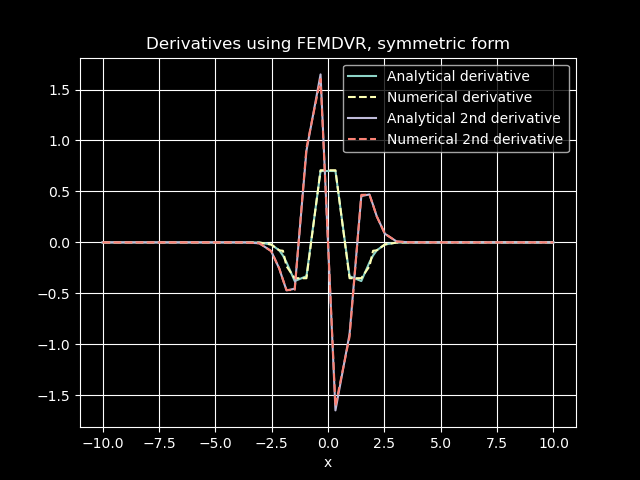

In [44]:
D = femdvr0.D_symmetric
D2 = femdvr0.D2_symmetric
f = x * np.exp(-x**2)
dfdx = (1 - 2 * x**2) * np.exp(-x**2)
ddfdx = (4 * x**3 - 6 * x) * np.exp(-x**2)

# Numerical derivatives in symmetric form. Note the mass matrix factors.
dfdx_numerical =  femdvr0.S_inv_sqrt * (D @ (femdvr0.S_sqrt * f))
ddfdx_numerical =  femdvr0.S_inv_sqrt * (D2 @ (femdvr0.S_sqrt * f))

error = np.max( np.abs( dfdx - dfdx_numerical ) )
print("Maximum error in first derivative: ", error)

error = np.max( np.abs( ddfdx - ddfdx_numerical ) )
print("Maximum error in second derivative: ", error)

plt.figure()
plt.plot(x, dfdx, label='Analytical derivative')
plt.plot(x, dfdx_numerical, '--', label='Numerical derivative')
plt.plot(x, ddfdx, label='Analytical 2nd derivative')
plt.plot(x, ddfdx_numerical, '--', label='Numerical 2nd derivative')    
plt.title('Derivatives using FEMDVR, symmetric form')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

Maximum error in Poisson problem:  1.7266188478970435e-12


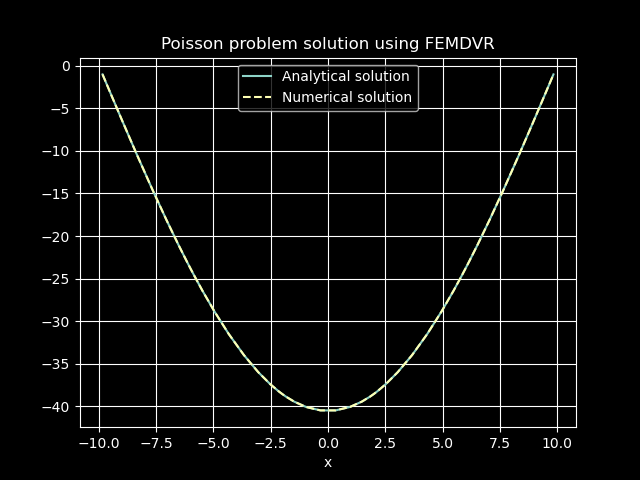

In [48]:
# Set up a poisson problem

f = np.cos( np.pi * x_inner / (2*L) )
u_exact = - (L**2 / (np.pi**2 / 4)) * np.cos( np.pi * x_inner / (2*L) )

D2_inner = femdvr0.D2[1:-1, 1:-1]
u_numerical =  np.linalg.solve( D2_inner.toarray(), f )
error = np.max( np.abs( u_exact - u_numerical ) )
print("Maximum error in Poisson problem: ", error)

plt.figure()
plt.plot(x_inner, u_exact, label='Analytical solution')
plt.plot(x_inner, u_numerical, '--', label='Numerical solution')
plt.title('Poisson problem solution using FEMDVR')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

Maximum error in Poisson problem:  9.379164112033322e-13


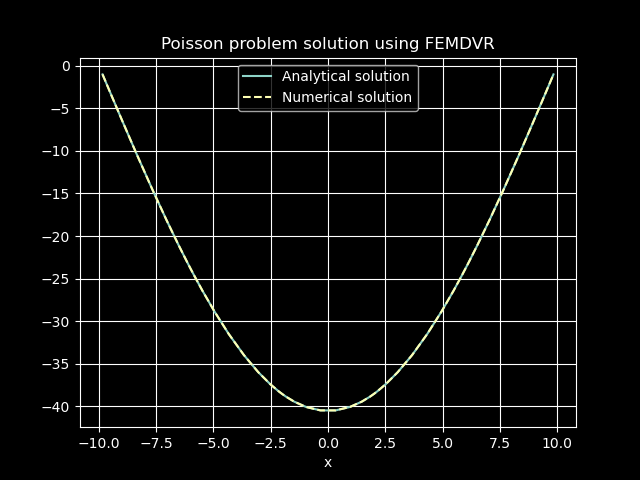

In [ ]:
# Set up a poisson problem, symmetric form

f = np.cos( np.pi * x_inner / (2*L) )
u_exact = - (L**2 / (np.pi**2 / 4)) * np.cos( np.pi * x_inner / (2*L) )

D2_symmetric_inner = femdvr0.D2_symmetric[1:-1, 1:-1]

u_numerical = femdvr0.S_inv_sqrt[1:-1] *  np.linalg.solve( D2_symmetric_inner.toarray(), femdvr0.S_sqrt[1:-1] * f )
error = np.max( np.abs( u_exact - u_numerical ) )
print("Maximum error in Poisson problem: ", error)

plt.figure()
plt.plot(x_inner, u_exact, label='Analytical solution')
plt.plot(x_inner, u_numerical, '--', label='Numerical solution')
plt.title('Poisson problem solution using FEMDVR, symmetric form')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()